In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(4) #Sets the seed of the random number generator

#Learning rate
eta=0.01;

N_epochs = 500;

#Problem definition:
N = 100;
x = 10*np.random.rand(N,1); # Generates a random array of shape (100, 1) with values ​​between 0 and 10.
x

array([[9.67029839],
       [5.47232249],
       [9.7268436 ],
       [7.14815994],
       [6.97728825],
       [2.16089496],
       [9.76274455],
       [0.06230255],
       [2.52982362],
       [4.34791532],
       [7.79382922],
       [1.97685075],
       [8.62993236],
       [9.83400677],
       [1.63842241],
       [5.97333944],
       [0.08986098],
       [3.86571283],
       [0.44160058],
       [9.56652968],
       [4.36146647],
       [9.48977307],
       [7.86305986],
       [8.66289299],
       [1.73165421],
       [0.74948587],
       [6.00742721],
       [1.67972184],
       [7.33380168],
       [4.0844386 ],
       [5.27908823],
       [9.37571584],
       [5.21696122],
       [1.08193383],
       [1.58223407],
       [5.45202652],
       [5.2440408 ],
       [6.37610244],
       [4.01495444],
       [6.49805109],
       [3.96900003],
       [6.23916114],
       [7.67404967],
       [1.7897391 ],
       [3.75575769],
       [5.02533059],
       [6.8666708 ],
       [2.536

In [3]:
ideal_a = -3;
ideal_b = 12;

d     = ideal_a * x + ideal_b;             # an ideal function y=−3x+12
s     = 4; #This is the standard deviation
noise = s * np.random.randn(N,1);
d     = d + noise;

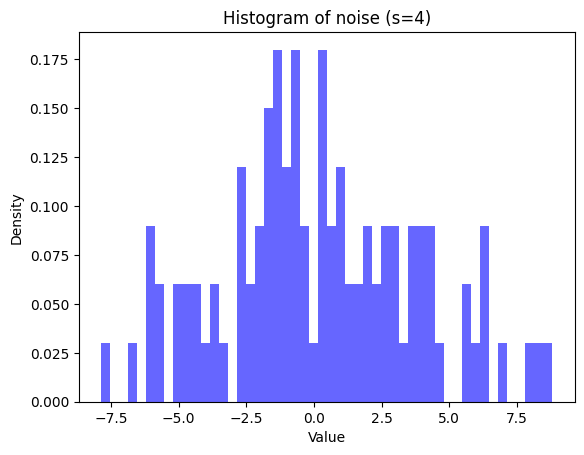

In [4]:
plt.hist(noise, bins=50, density=True, alpha=0.6, color='b')
plt.title("Histogram of noise (s=4)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

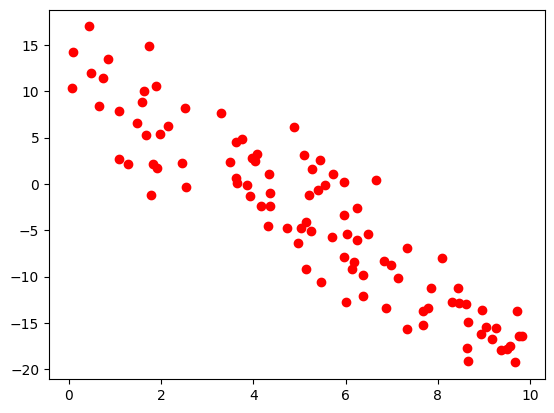

In [5]:
plt.scatter(x, d,c='red')
plt.show()

In [6]:
#We create matrix X and add a column with ones (representing the bias)
xo = np.ones((N,1)) # shape = (100, 1)
# Construct the input matrix X with an intercept term. shape = (100, 2)
X  = np.concatenate((xo, x), axis=1) # In order to include the intercept (bias) term in the model. 
X

array([[1.        , 9.67029839],
       [1.        , 5.47232249],
       [1.        , 9.7268436 ],
       [1.        , 7.14815994],
       [1.        , 6.97728825],
       [1.        , 2.16089496],
       [1.        , 9.76274455],
       [1.        , 0.06230255],
       [1.        , 2.52982362],
       [1.        , 4.34791532],
       [1.        , 7.79382922],
       [1.        , 1.97685075],
       [1.        , 8.62993236],
       [1.        , 9.83400677],
       [1.        , 1.63842241],
       [1.        , 5.97333944],
       [1.        , 0.08986098],
       [1.        , 3.86571283],
       [1.        , 0.44160058],
       [1.        , 9.56652968],
       [1.        , 4.36146647],
       [1.        , 9.48977307],
       [1.        , 7.86305986],
       [1.        , 8.66289299],
       [1.        , 1.73165421],
       [1.        , 0.74948587],
       [1.        , 6.00742721],
       [1.        , 1.67972184],
       [1.        , 7.33380168],
       [1.        , 4.0844386 ],
       [1.

In [7]:
#We initialise the weight vector randomly 
w = np.random.randn(2,1) # zero-mean Gaussian with variance 1

error_epoch=np.zeros((N_epochs+1,1))
# print(error_epoch)
w

array([[-0.59038339],
       [-1.35003972]])

### error_epoch[0][0]=(Xw−d)^T(Xw−d)

$ w = w + \eta \cdot \text{error}_j \cdot X[j, :]^T $


In [8]:
error_epoch[0][0]= np.matmul((np.matmul(X,w)-d).T,(np.matmul(X,w)-d)) #  Record initial error

for i in range(N_epochs):
   for j in range(N):
       error_j=d[j]-np.matmul(X[j,:],w) # we calculate error for j input
       # print(error_j)
       w = w + np.asmatrix(error_j[0] * X[j,:].T * eta).T # update w
       # print(w)

 
   error_epoch[i+1][0]= np.matmul((np.matmul(X,w)-d).T,(np.matmul(X,w)-d))
   


/var/folders/xy/jhstkkdx60bfh4q1zbwy93zh0000gn/T/ipykernel_65058/3735123892.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  error_epoch[0][0]= np.matmul((np.matmul(X,w)-d).T,(np.matmul(X,w)-d)) #  Record initial error
/var/folders/xy/jhstkkdx60bfh4q1zbwy93zh0000gn/T/ipykernel_65058/3735123892.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  error_epoch[i+1][0]= np.matmul((np.matmul(X,w)-d).T,(np.matmul(X,w)-d))


In [9]:
print(error_epoch[0][0])
print(error_epoch)

5285.058667871696
[[5285.05866787]
 [3720.00112482]
 [2846.86672354]
 [2309.61302169]
 [1984.23176345]
 [1791.56456176]
 [1681.25706969]
 [1621.42038888]
 [1591.97620616]
 [1580.37833162]
 [1578.86625929]
 [1582.7055787 ]
 [1589.06340691]
 [1596.2919124 ]
 [1603.47366688]
 [1610.13463509]
 [1616.06421434]
 [1621.2034043 ]
 [1625.57615021]
 [1629.24789225]
 [1632.30113333]
 [1634.82154955]
 [1636.89054503]
 [1638.5816742 ]
 [1639.95932314]
 [1641.07865744]
 [1641.98623246]
 [1642.72090599]
 [1643.31484521]
 [1643.79451298]
 [1644.18157533]
 [1644.49370512]
 [1644.74527615]
 [1644.94795236]
 [1645.11118163]
 [1645.24260587]
 [1645.34839923]
 [1645.43354546]
 [1645.50206453]
 [1645.55719714]
 [1645.60155457]
 [1645.63724013]
 [1645.66594749]
 [1645.68904012]
 [1645.70761549]
 [1645.72255678]
 [1645.73457467]
 [1645.74424096]
 [1645.75201567]
 [1645.75826889]
 [1645.76329831]
 [1645.76734341]
 [1645.77059681]
 [1645.77321345]
 [1645.77531794]
 [1645.77701052]
 [1645.77837182]
 [1645.779466

In [10]:

print('Fitting weights')
print(w)

error = np.matmul((np.matmul(X,w)-d).T,(np.matmul(X,w)-d))
print('Fitting error:')
print(error)


Fitting weights
[[12.68621857]
 [-3.41418586]]
Fitting error:
[[1645.78396526]]


- w.item(1,0) * a[0] + w.item(0,0) The predicted value is calculated when x = -1.
- w.item(1,0) * a[1] + w.item(0,0) The predicted value is calculated when x = -11.

In [11]:
#Best fit
a= [ -1, 11]
# Calculate the y-values ​​based on the linear model 𝑦 = 𝑤_1 × 𝑥 + 𝑤_0.
b= [ w.item(1,0)*a[0] + w.item(0,0), w.item(1,0)*a[1] + w.item(0,0) ] # item is used to access the value


In [12]:
w.item(0,0) # bias

12.686218567589966

In [13]:
w.item(1,0) # corresponds to the weight (slope) of the input feature x

-3.41418585675556

In [14]:
#True curve
a= [ -1, 11]
b_true= [-ideal_a+ideal_b, ideal_a*11+ideal_b]

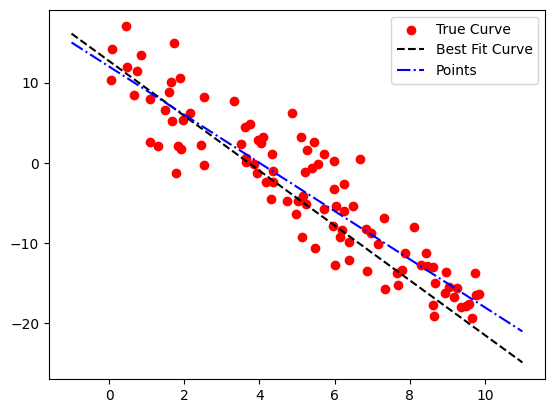

In [15]:
plt.scatter(x, d,c='red')
plt.plot(a, b, '--k')
plt.plot(a, b_true, '-.b')
plt.legend(["True Curve", "Best Fit Curve","Points"])
plt.show()